.

# Klasifikasi Pakaian dan Aksesoris F mnist dengan menggunakan Metode CNN

.

## Mengimport Library yang di perlukan

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Mengimport Library TensorFlow dan tf.keras
import tensorflow as tf
from tensorflow import keras

# Import Pandas untuk data manipulasi dataframes
import pandas as pd

#Import Numpy untuk kalkulasi / perhitungan
import numpy as np

# Import Warnings 
import warnings
warnings.filterwarnings('ignore')

# Import matplotlib untuk visualisasi data
import matplotlib.pyplot as plt

#Import train_test_split dari scikit library
from sklearn.model_selection import train_test_split

print(tf.__version__)

1.15.0


.


### Download Dataset


In [0]:
!mkdir data/fashion
!wget -O data/fashion/train-images-idx3-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
!wget -O data/fashion/train-labels-idx1-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
!wget -O data/fashion/t10k-images-idx3-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
!wget -O data/fashion/t10k-labels-idx1-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

mkdir: cannot create directory ‘data/fashion’: File exists
--2019-11-13 09:40:31--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.72.86
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.72.86|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘data/fashion/train-images-idx3-ubyte.gz’

data/fashion/train- 100%[===================>]  25.20M  6.53MB/s    in 3.9s    

2019-11-13 09:40:35 (6.53 MB/s) - ‘data/fashion/train-images-idx3-ubyte.gz’ saved [26421880/26421880]

--2019-11-13 09:40:36--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazo

.

## Preprocessing

### Load / Import Dataset

In [0]:
# Import libraries
from tensorflow.examples.tutorials.mnist import input_data

# Import Dataset ke variabel => Fashion_MNIST
fashion_mnist = input_data.read_data_sets('data/fashion', one_hot=True)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


.


### Memeriksa Data
Memeriksa dimensi dan skala dataset yang akan kita gunakan.

In [0]:
# Shapes dari Training set
print("Training set (images) shape  : {shape}".format(shape=fashion_mnist.train.images.shape))
print("Training set (labels) shape  : {shape}".format(shape=fashion_mnist.train.labels.shape))

# Shape dari Validasi set
print("Validasi set (images) shape  : {shape}".format(shape=fashion_mnist.validation.images.shape))
print("Validasi set (labels) shape  : {shape}".format(shape=fashion_mnist.validation.labels.shape))

# Shapes dari Test set
print("Test set (images) shape      : {shape}".format(shape=fashion_mnist.test.images.shape))
print("Test set (labels) shape      : {shape}".format(shape=fashion_mnist.test.labels.shape))

Training set (images) shape  : (55000, 784)
Training set (labels) shape  : (55000, 10)
Validasi set (images) shape  : (5000, 784)
Validasi set (labels) shape  : (5000, 10)
Test set (images) shape      : (10000, 784)
Test set (labels) shape      : (10000, 10)


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

.

### Visualisasi Awal


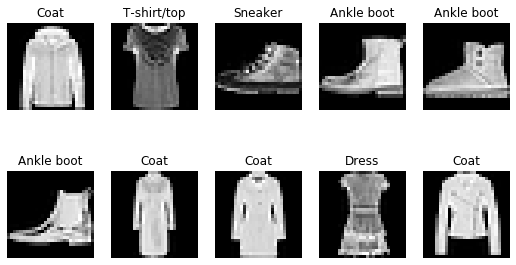

In [0]:
import numpy as np

fig, axes = plt.subplots(2, 5, figsize=(9,5))
for img, label, ax in zip(fashion_mnist.train.images[0:20], np.argmax(fashion_mnist.train.labels[0:20], 1), axes.flat):
  ax.set_title(class_names[label])
  ax.imshow(img.reshape(28,28), cmap=plt.get_cmap('gray'))
  ax.axis('off')
plt.show()

Melihat gambar pertama dari data training
Melihat gambar pertama dari data testing


Text(0.5, 1.0, '(Label: Ankle boot)')

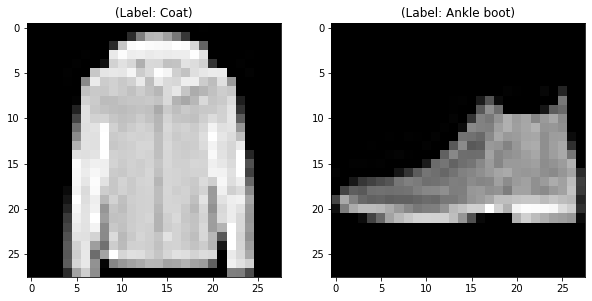

In [0]:
plt.figure(figsize=[10,10])

# Visualisasi dari image pertama pada data training
plt.subplot(121)
curr_img = np.reshape(fashion_mnist.train.images[0], (28,28))
curr_lbl = np.argmax(fashion_mnist.train.labels[0,:])
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(class_names[curr_lbl]) + ")")

# Visualisasi first image pertama dari data testing
plt.subplot(122)
curr_imgs = np.reshape(fashion_mnist.test.images[0], (28,28))
curr_lbls = np.argmax(fashion_mnist.test.labels[0,:])
plt.imshow(curr_imgs, cmap='gray')
plt.title("(Label: " + str(class_names[curr_lbls]) + ")")

In [0]:
fashion_mnist.train.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00392157,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.17254902,
       0.49803925, 0.7137255 , 0.7254902 , 0.6313726 , 0.47058827,
       0.21568629, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.16470589, 0.77647066, 0.9843138 , 1.        , 0.9843138 ,
       0.97647065, 0.9686275 , 1.        , 0.98823535, 0.83921

.

In [0]:
type(fashion_mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

.

## Training

### Memecah data


Split Data dan mereshape nya

In [0]:
# Reshape training and testing image for input
train_X = fashion_mnist.train.images.reshape(-1, 28, 28, 1)
test_X = fashion_mnist.test.images.reshape(-1,28,28,1)
train_X = train_X.astype('float32') / 255
test_X = test_X.astype('float32') / 255
train_X.shape, test_X.shape

((55000, 28, 28, 1), (10000, 28, 28, 1))

In [0]:
# Reshape training and testing image for output
train_y = fashion_mnist.train.labels
test_y = fashion_mnist.test.labels
train_y.shape, test_y.shape

((55000, 10), (10000, 10))

### Set parameter dan Modelling
Membuat *Parameter* dan melakukan modeling

In [0]:
training_iters = 50 
learning_rate = 0.001 
batch_size = 128

### PARAMETER PERTAMA
# MNIST data input (img shape: 28*28)
n_input = 28

# MNIST total class (0-9 digits)
n_classes = 10

In [0]:
#semua placeholders  bertype float
x = tf.placeholder("float", [None, 28,28,1])
y = tf.placeholder("float", [None, n_classes])

In [0]:
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, dengan bias dan activation nya meggunakan RELU
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x) 

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],padding='SAME')

.

Mendefenisiikan variabel weights dan bias  

In [0]:
weights = {
    'wc1': tf.get_variable('W0', shape=(3,3,1,32), initializer=tf.contrib.layers.xavier_initializer()), 
    'wc2': tf.get_variable('W1', shape=(3,3,32,64), initializer=tf.contrib.layers.xavier_initializer()), 
    'wc3': tf.get_variable('W2', shape=(3,3,64,128), initializer=tf.contrib.layers.xavier_initializer()), 
    'wd1': tf.get_variable('W3', shape=(4*4*128,128), initializer=tf.contrib.layers.xavier_initializer()), 
    'out': tf.get_variable('W6', shape=(128,n_classes), initializer=tf.contrib.layers.xavier_initializer()), 
}
biases = {
    'bc1': tf.get_variable('B0', shape=(32), initializer=tf.contrib.layers.xavier_initializer()),
    'bc2': tf.get_variable('B1', shape=(64), initializer=tf.contrib.layers.xavier_initializer()),
    'bc3': tf.get_variable('B2', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'bd1': tf.get_variable('B3', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'out': tf.get_variable('B4', shape=(10), initializer=tf.contrib.layers.xavier_initializer()),
}

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.




Mendefinisikan architecture

In [0]:
def conv_net(x, weights, biases):  

    # memanggil fungsi conv2d, gambar input x, bobot wc1 dan bias bc1.
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling), mengambil max value dari matrix 2*2 dan menghasilkaln outputs  14*14 matrix.
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    # memanggil fungsi conv2d dan input image x, weights wc2 and bias bc2.
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling), tmengambil max value dari matrix 2*2 dan menghasilkaln outputs 7*7 matrix.
    conv2 = maxpool2d(conv2, k=2)

    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    # Max Pooling (down-sampling), mengambil max value dari matrix 2*2  dan menghasilkaln outputs 4*4 matrix.
    conv3 = maxpool2d(conv3, k=2)



    # Fully connected layer
    # Reshape conv2 output kedalam fit fully connected layer input
    fc1 = tf.reshape(conv3, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)

    # Output, class prediksi
    # fully connected layer dengan weights dan bias. 
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

.

### Loss and Optimizer

Modelling dengan memanggil fungsi conv_net () dengan memasukkan input x, weight, dan bias.
(Prediksi)

In [0]:
pred = conv_net(x, weights, biases)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



.

### Predeksi / Mengevaluasi Model

In [0]:
# Memprediksi apakah image prediksi sama dengan image asli
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

# Menghitung akurasi.
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
# Inisialisasi variabel
init = tf.global_variables_initializer()

### Training dan Testing the Model

In [0]:
with tf.Session() as sess:
    sess.run(init) 
    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []
    summary_writer = tf.summary.FileWriter('./Output', sess.graph)
    for i in range(training_iters):
        for batch in range(len(train_X)//batch_size):
            batch_x = train_X[batch*batch_size:min((batch+1)*batch_size,len(train_X))]
            batch_y = train_y[batch*batch_size:min((batch+1)*batch_size,len(train_y))]    
            # Run optimization op (backprop).
                # Menghitung batch loss and accuracy
            opt = sess.run(optimizer, feed_dict={x: batch_x,
                                                              y: batch_y})
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                                                              y: batch_y})
        print("Iter " + str(i) + ", Loss= " + \
                      "{:.6f}".format(loss) + ", Training Accuracy= " + \
                      "{:.5f}".format(acc))
        print("Optimization Finished!")

        # Menghitu accuracy untuk  10000 mnist test images
        test_acc,valid_loss = sess.run([accuracy,cost], feed_dict={x: test_X,y : test_y})
        train_loss.append(loss)
        test_loss.append(valid_loss)
        train_accuracy.append(acc)
        test_accuracy.append(test_acc)
        print("Testing Accuracy:","{:.5f}".format(test_acc))
    summary_writer.close()

Iter 0, Loss= 0.878659, Training Accuracy= 0.64844
Optimization Finished!
Testing Accuracy: 0.65610
Iter 1, Loss= 0.592704, Training Accuracy= 0.77344
Optimization Finished!
Testing Accuracy: 0.73650
Iter 2, Loss= 0.478201, Training Accuracy= 0.80469
Optimization Finished!
Testing Accuracy: 0.78140
Iter 3, Loss= 0.419111, Training Accuracy= 0.82812
Optimization Finished!
Testing Accuracy: 0.80880
Iter 4, Loss= 0.381368, Training Accuracy= 0.85156
Optimization Finished!
Testing Accuracy: 0.82390
Iter 5, Loss= 0.367318, Training Accuracy= 0.87500
Optimization Finished!
Testing Accuracy: 0.83320
Iter 6, Loss= 0.367451, Training Accuracy= 0.86719
Optimization Finished!
Testing Accuracy: 0.83920
Iter 7, Loss= 0.358864, Training Accuracy= 0.87500
Optimization Finished!
Testing Accuracy: 0.84580
Iter 8, Loss= 0.353694, Training Accuracy= 0.86719
Optimization Finished!
Testing Accuracy: 0.85050
Iter 9, Loss= 0.347797, Training Accuracy= 0.87500
Optimization Finished!
Testing Accuracy: 0.85260


.

## Evaluation

### Accuracy

In [0]:
print("Testing Accuracy  :","{:.5f}".format(test_acc))
print("Training Accuracy :","{:.5f}".format(acc))
print("Loss Accuracy     :","{:.5f}".format(loss))

Testing Accuracy  : 0.88640
Training Accuracy : 0.95312
Loss Accuracy     : 0.14120


### Visualisasi Hasil

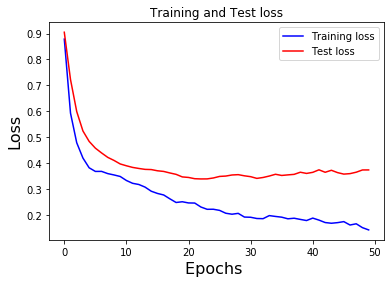

<Figure size 432x288 with 0 Axes>

In [0]:
# Visualisasi dari Test dan Traning Loss
plt.plot(range(len(train_loss)), train_loss, 'b', label='Training loss')
plt.plot(range(len(train_loss)), test_loss, 'r', label='Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()

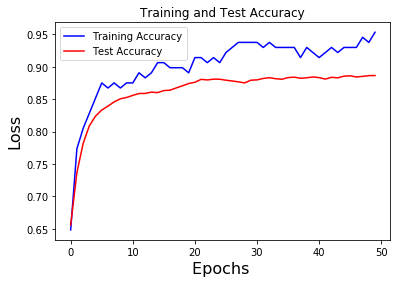

<Figure size 432x288 with 0 Axes>

In [0]:
# Visualisasi dari Accuracy Training dan Test
plt.plot(range(len(train_loss)), train_accuracy, 'b', label='Training Accuracy')
plt.plot(range(len(train_loss)), test_accuracy, 'r', label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()